The following code takes CSV file of polygons that came from the Flir camera and creates a file that contains the mean and standard deviation of each polygon. In order to prepare your data you will need to delete every empty line in the original CSV file:

**Important note**: ❗

1.  I built the function so that it will read 2 different files, each of which has 9 polygons, and create a unified file from them. Change the function as needed.

2. When you exctract the data from FLIR software to CSV don't forget to label the "**Include text annotations**" bottom.

Output CSV file from Flir (in yellow lines marked the data you should delete):
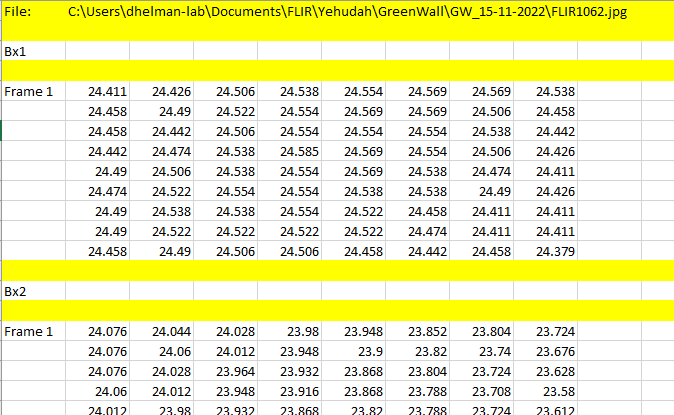

In [1]:
import pandas as pd
def Read_Flir_csv_24(file_path_right,file_path_left):
  ######### apply on right side df #########
  df_right = pd.read_csv(file_path_right, header=None,index_col=0)
  df_left = pd.read_csv(file_path_left, header=None,index_col=0)
  dfs = [df_right,df_left]
  # Empty lists of Avg and Std:
  means = []
  stds= []
  for df in dfs:
    # create list: ['Bx1','Bx2'...] based on the number of poligons:
    indexs = df.index.dropna().drop('Frame 1')
    for n,k in enumerate(indexs[:-1]):
      means.append(df.loc[indexs[n]:indexs[n+1]].stack().mean()) # add to list
      stds.append(df.loc[indexs[n]:indexs[n+1]].stack().std())
    # Append also the data of last poligon
    means.append(df.loc[indexs[-1]:].stack().mean())
    stds.append(df.loc[indexs[-1]:].stack().std())

    ######### Create df from the 2 lists #########
  leaf_num_list = [1,2,3,4,5,6,7,8,9,20,23,10,11,12,13,14,15,16,17,18,19,21,22,24]
  output_df =  pd.DataFrame(list(zip(means, stds)),
      columns=['Avg_T','Std_T'])
  output_df['leaf_num'] = leaf_num_list
  output_df = output_df.sort_values('leaf_num')
  
  return output_df

In [ ]:
def Read_Flir_csv(file_path_right,file_path_left):
  ######### apply on right side df #########
  df_right = pd.read_csv(file_path_right, header=None,index_col=0)
  df_left = pd.read_csv(file_path_left, header=None,index_col=0)
  dfs = [df_right,df_left]
  # Empty lists of Avg and Std:
  means = []
  stds= []
  for df in dfs:
    # create list: ['Bx1','Bx2'...] based on the number of poligons:
    indexs = df.index.dropna().drop('Frame 1')
    for n,k in enumerate(indexs[:-1]):
      means.append(df.loc[indexs[n]:indexs[n+1]].stack().mean()) # add to list
      stds.append(df.loc[indexs[n]:indexs[n+1]].stack().std())
    # Append also the data of last poligon
    means.append(df.loc[indexs[-1]:].stack().mean())
    stds.append(df.loc[indexs[-1]:].stack().std())

    ######### Create df from the 2 lists #########
  leaf_num_list = [i for i in range(1,19)]
  output_df =  pd.DataFrame(list(zip(means, stds)),
      columns=['Avg_T','Std_T'])
  
  return output_df


Example on my data:

## 16-11-2022

In [ ]:
data = Read_Flir_csv('/content/drive/MyDrive/Public/16-11-2022-thermal-right.csv',
                     "/content/drive/MyDrive/Public/16-11-2022-thermal-left.csv")
# data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/16-11-2022.csv') # If you want to save
# data

In [ ]:
file_path_right,file_path_left = '/content/drive/MyDrive/Public/16-11-2022-thermal-right.csv',"/content/drive/MyDrive/Public/16-11-2022-thermal-left.csv"

In [ ]:
df_right = pd.read_csv(file_path_right, header=None,index_col=0)
df_left = pd.read_csv(file_path_left, header=None,index_col=0)
dfs = [df_right,df_left]

# create list: ['Bx1','Bx2'...] based on the number of poligons:
index_first_poligon,index_last_poligon = 1,9
indexs = ['Bx'+str(i) for i in range(index_first_poligon,index_last_poligon+1)]
means = []
stds= []
for df in dfs:
  for n,k in enumerate(indexs[:-1]):
    means.append(df.loc[indexs[n]:indexs[n+1]].stack().mean()) # add to list
    stds.append(df.loc[indexs[n]:indexs[n+1]].stack().std())
  # Append also the data of last poligon
  means.append(df.loc[indexs[-1]:].stack().mean())
  stds.append(df.loc[indexs[-1]:].stack().std())

  ######### Create df from the 2 lists #########
leaf_num_list = [i for i in range(1,19)]
output_df =  pd.DataFrame(list(zip(means, stds)),
    columns=['Avg_T','Std_T'])

In [ ]:
output_df

,Avg_T,Std_T
0,22.894562,0.066785
1,23.586688,0.032331
2,24.447350,0.044247
3,22.999714,0.025706
4,23.960343,0.049500
5,24.515033,0.083662
6,22.443444,0.094619
7,22.588818,0.090181
8,22.944055,0.097068
9,23.482690,0.074548


## 20-11-2022

In [ ]:
data = Read_Flir_csv(file_path_right = "/content/drive/MyDrive/Public/20-11-2022-thermal-right.csv",
                     file_path_left = "/content/drive/MyDrive/Public/20-11-2022-thermal-left.csv")
data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/20-11-2022.csv') # If you want to save
data

,Avg_T,Std_T
0,23.520000,0.038008
1,23.789067,0.048263
2,24.038400,0.048217
3,22.976000,0.025629
4,23.330250,0.078309
5,23.984625,0.125201
6,22.856167,0.110663
7,23.452833,0.085078
8,23.455675,0.096146
9,23.659000,0.034206


## 22-11-2022

In [ ]:
data = Read_Flir_csv(file_path_right = "/content/drive/MyDrive/Public/22-11-2022-thermal-right.csv",
                     file_path_left = "/content/drive/MyDrive/Public/22-11-2022-thermal-left.csv")
data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/22-11-2022.csv') # If you want to save
data

## 23-11-2022

In [ ]:
# data = Read_Flir_csv_24(file_path_right = "/content/drive/MyDrive/Public/23-11-2022-thermal-right_24.csv",
#                      file_path_left = "/content/drive/MyDrive/Public/23-11-2022-thermal-left_24.csv")
# data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/23-11-2022.csv') # If you want to save
# data

,Avg_T,Std_T,leaf_num
0,23.419350,0.024342,1
1,23.621000,0.064531,2
2,23.611625,0.081273,3
3,23.304475,0.067073,4
4,23.661667,0.045370,5
5,24.333190,0.068955,6
6,23.735667,0.048038,7
7,23.474150,0.082382,8
8,23.223991,0.053026,9
11,23.549200,0.027922,10


## 27-11-2022

In [ ]:
data = Read_Flir_csv_24(file_path_right = "/content/drive/MyDrive/Public/27-11-2022-thermal-right_24.csv",
                     file_path_left = "/content/drive/MyDrive/Public/27-11-2022-thermal-left_24.csv")
data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/27-11-2022.csv') # If you want to save
data

,Avg_T,Std_T,leaf_num
0,21.750150,0.018793,1
1,21.949350,0.027248,2
2,21.929417,0.032329,3
3,21.536756,0.060744,4
4,21.921800,0.044156,5
5,22.130267,0.024914,6
6,21.192429,0.099671,7
7,21.295889,0.040367,8
8,20.652714,0.054735,9
11,21.624833,0.054700,10


## 29-11-2022

In [ ]:
data = Read_Flir_csv_24(file_path_right = "/content/drive/MyDrive/Public/29-11-2022-thermal-right_24.csv",
                     file_path_left = "/content/drive/MyDrive/Public/29-11-2022-thermal-left_24.csv")
data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/29-11-2022.csv') # If you want to save
data

,Avg_T,Std_T,leaf_num
0,22.990750,0.029677,1
1,23.252583,0.072376,2
2,23.425333,0.022627,3
3,22.797389,0.083781,4
4,23.515278,0.058324,5
5,23.603417,0.056236,6
6,22.729808,0.079086,7
7,22.141515,0.110952,8
8,22.711159,0.119312,9
11,23.002771,0.037688,10


## 30-11-2022

In [2]:
data = Read_Flir_csv_24(file_path_right = "/content/drive/MyDrive/Public/30-11-2022-thermal-right_24.csv",
                     file_path_left = "/content/drive/MyDrive/Public/30-11-2022-thermal-left_24.csv")
data.to_csv('/content/drive/MyDrive/Greenwall/Thermal_images/Data/30-11-2022.csv') # If you want to save
data

,Avg_T,Std_T,leaf_num
0,23.295000,0.027902,1
1,23.436000,0.030358,2
2,23.652917,0.040811,3
3,22.973250,0.036605,4
4,23.468444,0.041808,5
5,24.009120,0.051443,6
6,21.694417,0.046091,7
7,22.717978,0.048045,8
8,22.130446,0.045440,9
11,23.674222,0.054999,10
